17:03:28 - cmdstanpy - INFO - Chain [1] start processing
17:03:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error on Validation Data: 70911725441.72829
Mean Squared Error on Test Data: 104013077895.18063


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x12fe62090>.

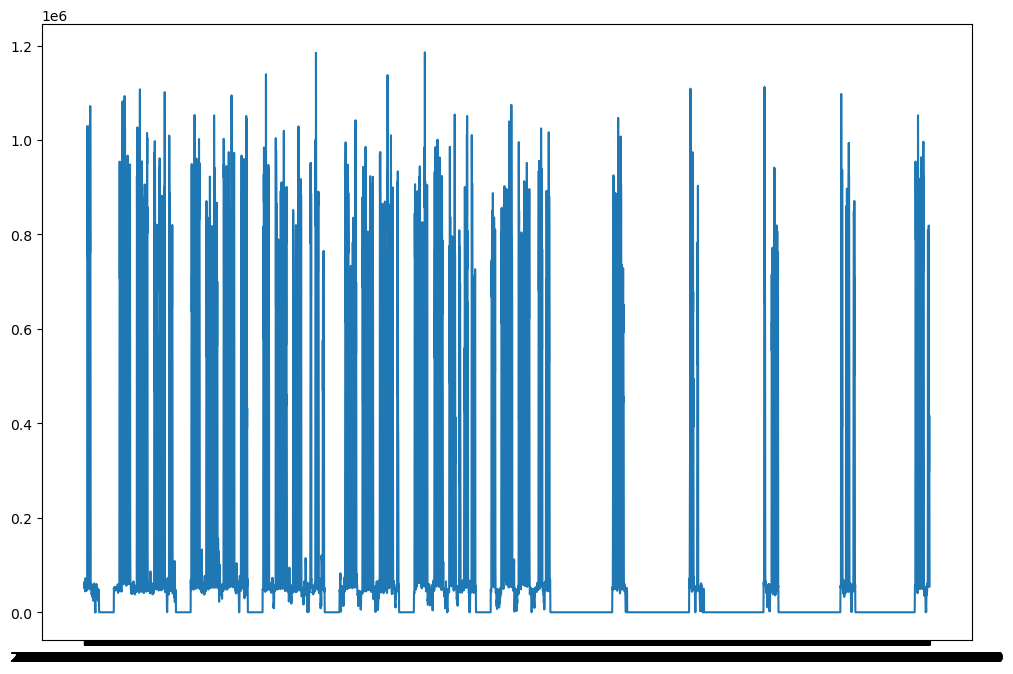

In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv('data/cleaned_consumption_hg.csv')

# Datenaufteilung
train_size = int(len(df) * 0.6)
valid_size = int(len(df) * 0.2)
test_size = len(df) - train_size - valid_size

train_df = df.iloc[:train_size]
valid_df = df.iloc[train_size:train_size + valid_size]
test_df = df.iloc[train_size + valid_size:]

# Modell initialisieren und trainieren
model = Prophet()
model.fit(train_df)

# Validierungsdaten vorhersagen
future_valid = model.make_future_dataframe(periods=len(valid_df), freq='h')
forecast_valid = model.predict(future_valid)
forecast_valid = forecast_valid.iloc[-len(valid_df):]

# Vorhersagen für Validierungsdaten evaluieren
y_valid_true = valid_df['y'].values
y_valid_pred = forecast_valid['yhat'].values
mse_valid = mean_squared_error(y_valid_true, y_valid_pred)
print(f"Mean Squared Error on Validation Data: {mse_valid}")

# Testdaten vorhersagen
future_test = model.make_future_dataframe(periods=len(test_df), freq='h')
forecast_test = model.predict(future_test)
forecast_test = forecast_test.iloc[-len(test_df):]

# Vorhersagen für Testdaten evaluieren
y_test_true = test_df['y'].values
y_test_pred = forecast_test['yhat'].values
mse_test = mean_squared_error(y_test_true, y_test_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Plotten der Vorhersagen
plt.figure(figsize=(12, 8))
plt.plot(df['ds'], df['y'], label='Original Data')
plt.plot(forecast_valid['ds'], forecast_valid['yhat'], label='Validation Forecast', linestyle='--')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Test Forecast', linestyle='--')
plt.axvline(x=valid_df['ds'].iloc[0], color='r', linestyle='--', label='Validation Split')
plt.axvline(x=test_df['ds'].iloc[0], color='g', linestyle='--', label='Test Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecast')
plt.legend()
plt.show()
